In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [370]:
train_data=pd.read_csv("machinehack_traindata.csv")
test_data=pd.read_csv("machinehack_testdata.csv")

In [371]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [372]:
train=train_data.drop(columns=['InvoiceDate'],axis=1)

In [373]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
3,16971,2115,2983,1,0.83,15525.0,35
4,6080,1210,2886,12,1.65,13952.0,35


In [374]:
train.shape

(284780, 7)

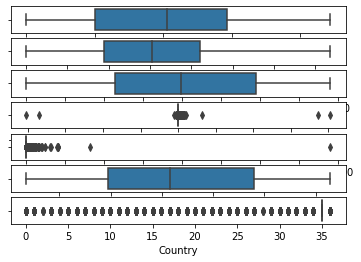

In [375]:
import seaborn as sns
plt.subplot(7,1,1)
sns.boxplot(x=train['InvoiceNo'])
plt.subplot(7,1,2)
sns.boxplot(x=train['StockCode'])
plt.subplot(7,1,3)
sns.boxplot(x=train['Description'])
plt.subplot(7,1,4)
sns.boxplot(x=train['Quantity'])
plt.subplot(7,1,5)
sns.boxplot(x=train['UnitPrice'])
plt.subplot(7,1,6)
sns.boxplot(x=train['CustomerID'])
plt.subplot(7,1,7)
sns.boxplot(x=train['Country'])

In [376]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 7 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5)
memory usage: 15.2 MB


In [377]:
from scipy import stats

In [378]:
z1=np.abs(stats.zscore(train['Quantity']))
print(np.where(z1>3.5))

(array([  1591,   1862,   1950,   5758,   6362,  10191,  14020,  18215,
        18952,  21014,  22458,  23457,  25879,  26477,  34794,  40337,
        40705,  49344,  51142,  52522,  55833,  56936,  59180,  64934,
        77724,  79209,  82825,  93723, 106322, 108723, 113965, 137435,
       138395, 141379, 143907, 147279, 148964, 149832, 155078, 156895,
       164438, 164459, 167029, 168224, 171537, 173728, 175961, 176484,
       179686, 180978, 190940, 195574, 196979, 205865, 206519, 207094,
       208554, 209958, 210734, 211311, 211647, 224031, 224110, 230766,
       238860, 242248, 243031, 252594, 266414, 269908, 271013, 275905,
       279013, 279948, 284146], dtype=int64),)


In [379]:
train['Quantity']=train['Quantity'][(z1<3.5)]

In [380]:
z2=np.abs(stats.zscore(train['UnitPrice']))
print(np.where(z2>3.5))

(array([  8863,  11961,  11985,  14360,  16288,  21486,  21746,  21845,
        22051,  28411,  31590,  32504,  33918,  34489,  39158,  44396,
        45493,  49759,  51127,  52322,  55365,  58879,  60351,  65239,
        70442,  71290,  81197,  87016,  96258,  97102,  98415,  98450,
       103356, 110272, 111657, 112590, 113506, 113566, 122286, 124159,
       125066, 127009, 130542, 131602, 138648, 139096, 140723, 147140,
       152211, 155565, 156432, 160890, 162068, 163627, 171325, 177531,
       179483, 181228, 185479, 191931, 198795, 200062, 202144, 205372,
       207110, 211437, 212754, 214454, 217536, 221253, 221394, 222500,
       222777, 223867, 225183, 238183, 238317, 239318, 239556, 242872,
       247232, 251433, 251735, 258639, 259861, 262525, 263589, 266800,
       280905], dtype=int64),)


In [381]:
train['UnitPrice']=train['UnitPrice'][(z2<3.5)]

In [382]:
corr1=train['InvoiceNo'].corr(train['UnitPrice'])
corr1

-0.007460782744895531

In [383]:
corr2=train['StockCode'].corr(train['UnitPrice'])
corr2

0.09475933017199929

In [384]:
corr3=train['Description'].corr(train['UnitPrice'])
corr3

-0.00853953515607497

In [385]:
corr4=train['Quantity'].corr(train['UnitPrice'])
corr4

-0.10014263167629155

In [386]:
corr5=train['CustomerID'].corr(train['UnitPrice'])
corr5

-0.02848653057556471

In [387]:
corr6=train['Country'].corr(train['UnitPrice'])
corr6

-0.050022224808922634

In [388]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 7 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284705 non-null float64
UnitPrice      284691 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(3), int64(4)
memory usage: 15.2 MB


In [389]:
train.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       75
UnitPrice      89
CustomerID      0
Country         0
dtype: int64

In [390]:
m1=(train['Quantity'].mean())
m2=(train['UnitPrice'].mean())

In [391]:
train['Quantity'].replace(np.nan,m1,inplace=True)
train['UnitPrice'].replace(np.nan,m2,inplace=True)

In [392]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 7 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null float64
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(3), int64(4)
memory usage: 15.2 MB


In [393]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3.0,3.75,14056.0,35
1,6349,1300,3682,6.0,1.95,13098.0,35
2,16783,2178,1939,4.0,5.95,15044.0,35
3,16971,2115,2983,1.0,0.83,15525.0,35
4,6080,1210,2886,12.0,1.65,13952.0,35


In [394]:
train.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [395]:
train.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [396]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 7 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null float64
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(3), int64(4)
memory usage: 15.2 MB


In [397]:
train.shape

(284780, 7)

In [398]:
t_x=np.asanyarray(train[['InvoiceNo','StockCode','Description','Quantity','CustomerID','Country']])
t_y=np.asanyarray((train[['UnitPrice']]))
print(t_x.shape,t_y.shape)

(284780, 6) (284780, 1)


In [399]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lr=linear_model.LinearRegression()
lr.fit(t_x,t_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [400]:
test_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [401]:
test=test_data.drop(columns=['InvoiceDate'],axis=1)

In [402]:
test.shape

(122049, 6)

In [403]:
result=lr.predict(test)

In [404]:
result

array([[3.21740276],
       [2.56022028],
       [2.00407065],
       ...,
       [3.00321389],
       [3.12152488],
       [3.27518851]])

In [365]:
r=pd.DataFrame(data=result).round(2)

In [366]:
r

,0
0,-23.57
1,-31.71
2,-46.09
3,-33.10
4,-27.65
5,-24.87
6,-49.43
7,-24.47
8,-35.70
9,-32.74


In [367]:
r.columns=['UnitPrice']

In [368]:
r.to_csv("s2.csv")